In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import glob
from keras.preprocessing import image
from scipy import spatial

8.1.1 Prepare main image feature

(300, 264, 3)


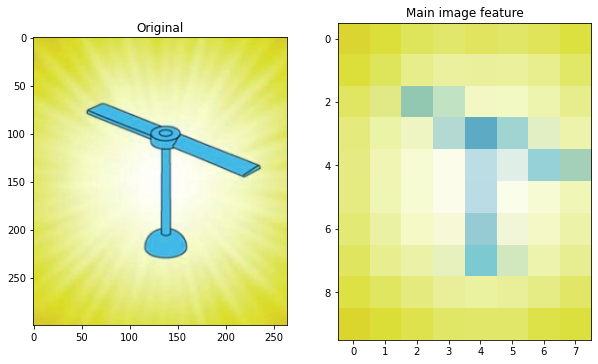

In [102]:
#Load main image
main_image = cv2.imread('./image.jpg')
print(main_image.shape)
#Define tile size
#            height, width
tile_size = (30,30)
# feature_height = main_image.shape[0]
# feature_width = main_image.shape[1]

feature_height = 10
feature_width = 8

# Create main image feature grid of subimage
# Calculate average (mean) color of each subimage with tile_size
main_image_feature = np.zeros(shape=(feature_height, feature_width, 3), dtype=np.uint8)

for i in range(feature_height):
  for j in range(feature_width):
    main_image_feature[i,j] = main_image[i*tile_size[0] : (i+1)*tile_size[0], j*tile_size[1]: (j+1)*tile_size[1]].mean(axis=(0,1))

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(main_image)
plt.subplot(1, 2 ,2)
plt.title("Main image feature")
plt.imshow(main_image_feature)

8.1.2 Prepare tile images features

In [103]:
# Collect filename of all tile images
path =  "./dataset/Background/*"
all_files = glob.glob(path)
print(len(all_files))

print(tile_size)
# Load tile images and resize to tile_size
tiles = []
for path in all_files:
    tile = cv2.imread(path)      #     30            30
    tile = cv2.resize(tile,dsize=(tile_size[0], tile_size[1]), interpolation=cv2.INTER_AREA)
    if(tile.shape[0] != 30 or tile.shape[1] != 30):
        print('!!')
    tiles.append(tile)

100
(30, 30)


In [104]:
# Create array of average (mean) color of each tile image
tile_features = []
for tile in tiles:
    mean_color = np.array(tile).mean(axis=(0, 1))
    tile_features.append(mean_color)

print(tile_features[0], tile_features[1])

[118.67888889 112.16333333 122.15444444] [203.72111111 146.56444444  11.51666667]


### Image Clustering and Matching using KNN with KDTree Algorithm

8.2 IMAGE CLUSTERING AND MATCHING WITH KNN (KDTREE)

10 8


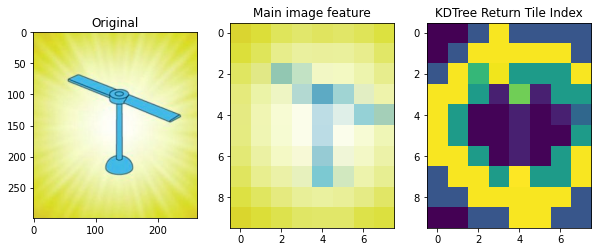

In [105]:
#Create KDTree of tile color features
tree = spatial.KDTree(tile_features)

closest_tiles = np.zeros(shape=(feature_height, feature_width), dtype=np.uint8)

print(feature_height, feature_width)
#KNN (k=1) search for best matched tiles with each subimage
for i in range(feature_height):
  for j in range(feature_width):
    closest = tree.query(main_image_feature[i,j])
    closest_tiles[i, j] = closest[1]

plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(main_image)
plt.subplot(1, 3 ,2)
plt.title("Main image feature")
plt.imshow(main_image_feature)
plt.subplot(1, 3 ,3)
plt.title("KDTree Return Tile Index")
plt.imshow(closest_tiles)

### Create Image Mosaic

8.3 CREATE IMAGE MOSAIC

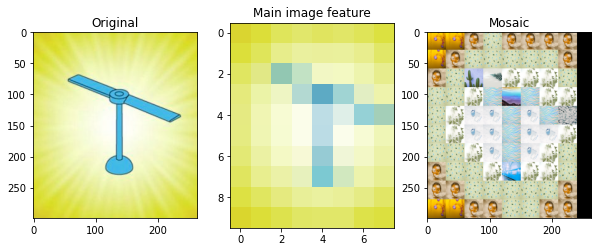

In [106]:
# Fill each subimage with matched tile
img = np.zeros(shape=(main_image.shape[0], main_image.shape[1], 3), dtype=np.uint8)
# print(tiles)
# Offset of tile
# x, y = i*tile_size[0], j*tile_size[1]
# print(tiles[1].shape)
for i in range(feature_height):
  for j in range(feature_width):
    x, y = i*tile_size[0], j*tile_size[1]
# Index of tile
# index = closest_tiles[i, j]
# main_photo[x:(x+tile_size[0]), y:(y+tile_size[1]),:] = tiles[index]
    index = closest_tiles[i, j]
    # print(index)
    img[x: (x+tile_size[0]), y: (y+tile_size[1])] = tiles[index]

plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(main_image)
plt.subplot(1, 3 ,2)
plt.title("Main image feature")
plt.imshow(main_image_feature)
plt.subplot(1, 3 ,3)
plt.title("Mosaic")
plt.imshow(img)